In [1]:
import numpy as np
import pandas as pd

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from shapely.geometry import box

def plot_instrument_coverage(selected_instruments=None, world_shapefile_path=None):
    """
    Plots the geographic coverage of specified remote sensing instruments as bounding polygons.

    Parameters:
    selected_instruments (list): List of instrument names to plot. If None, all instruments are plotted.
    world_shapefile_path (str): Path to the world shapefile (.shp) for the base map.
    """
    # Define instrument coverage bounds: (min_lon, min_lat, max_lon, max_lat)
    instruments = {
        'EnMAP': {
            'bounds': (-180, -80, 180, 80),
            'color': 'blue'
        },
        'PRISMA': {
            'bounds': (-180, -70, 180, 70),
            'color': 'green'
        },
        'DESIS': {
            'bounds': (-180, -52, 180, 55),
            'color': 'red'
        },
        'HISUI': {
            'bounds': (-180, -52, 180, 55),
            'color': 'orange'
        },
        'Sentinel-2': {
            'bounds': (-180, -56, 180, 84),
            'color': 'purple'
        },
        'Sentinel-3 OLCI': {
            'bounds': (-180, -90, 180, 90),
            'color': 'cyan'
        },
        'NEON AOP': {
            'bounds': (-125, 25, -66, 49),  # Approximate bounds for contiguous USA
            'color': 'magenta'
        },
        'AVIRIS-NG': {
            'bounds': (-125, 25, -66, 49),  # Approximate bounds for contiguous USA
            'color': 'yellow'
        },
        'HyMap': {
            'bounds': (112, -44, 154, -10),  # Approximate bounds for Australia
            'color': 'brown'
        },
        'AISA Eagle': {
            'bounds': (20, 59, 32, 70),  # Approximate bounds for Finland
            'color': 'gray'
        },
        'CASI-1500': {
            'bounds': (-141, 41, -52, 83),  # Approximate bounds for Canada
            'color': 'olive'
        }
    }

    # If no specific instruments are selected, plot all
    if selected_instruments is None:
        selected_instruments = instruments.keys()

    # Create GeoDataFrame for instrument coverage polygons
    coverage_polygons = []
    for name in selected_instruments:
        if name in instruments:
            bounds = instruments[name]['bounds']
            polygon = box(*bounds)
            coverage_polygons.append({
                'instrument': name,
                'geometry': polygon,
                'color': instruments[name]['color']
            })
        else:
            print(f"Instrument '{name}' not recognized.")

    gdf = gpd.GeoDataFrame(coverage_polygons, crs="EPSG:4326")

    # Load world map for context
    if world_shapefile_path:
        try:
            world = gpd.read_file(world_shapefile_path)
        except Exception as e:
            print(f"Error loading world shapefile: {e}")
            world = None
    else:
        world = None

    # Plotting
    fig, ax = plt.subplots(figsize=(15, 10))
    if world is not None:
        world.plot(ax=ax, color='lightgray', edgecolor='black')
    else:
        print("World shapefile not provided or could not be loaded. Proceeding without base map.")

    # Plot each instrument's coverage polygon
    legend_patches = []
    for idx, row in gdf.iterrows():
        gpd.GeoSeries([row['geometry']]).plot(ax=ax, color=row['color'], alpha=0.5, edgecolor='black')
        legend_patches.append(mpatches.Patch(color=row['color'], label=row['instrument']))

    # Customize plot
    ax.set_title('Global Coverage of Selected Remote Sensing Instruments')
    ax.set_axis_off()
    ax.legend(handles=legend_patches, loc='lower left', bbox_to_anchor=(1, 0))

    plt.tight_layout()
    plt.show()


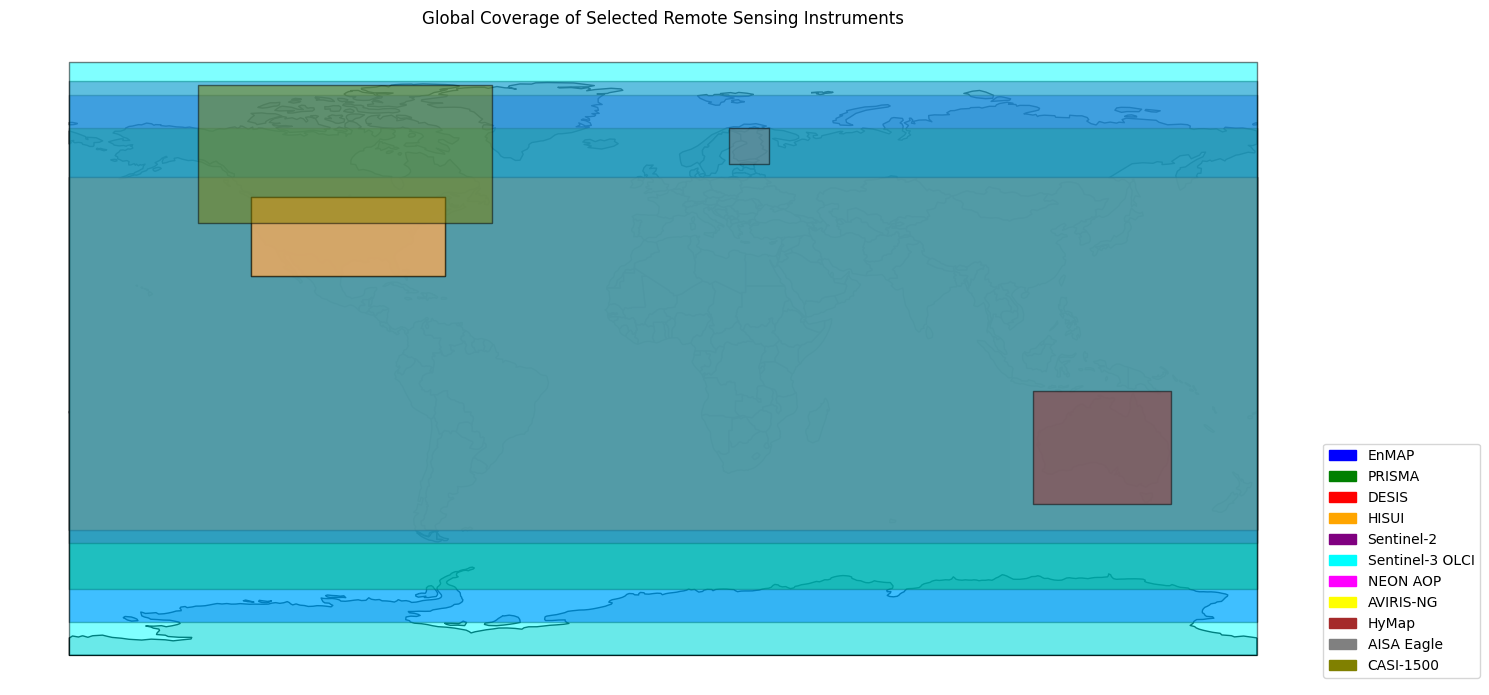

In [13]:
plot_instrument_coverage(world_shapefile_path='../data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
